In [1]:
class ReadData():
    """
    # Usage:
    # df = ReadData(file_name, url).createDF() 
    """
    def __init__(self, file_name, 
                 url = None,
                 org_name = 'good-food', 
                 repo_name = 'datamap2019', 
                 folder_path = '/data/', 
                 mode = 'wb'
                ):
        
        self.file_name = file_name
        self.org_name = org_name
        self.repo_name = repo_name
        self.folder_path = folder_path
        
        self.url = url
        self.mode = mode
        
        self.root_path = 'https://github.com/'
        self.raw_path = 'https://raw.githubusercontent.com/'
        self.branch = 'master'

    def getPath(self):
        if self.url == None:
            path = self.root_path + self.org_name + '/' + self.repo_name + '/blob/' + self.branch + self.folder_path + self.file_name
            raw_path = self.raw_path + self.org_name + '/' + self.repo_name + '/' + self.branch + self.folder_path + self.file_name
        else:
            raw_path = self.url
            
        print('Url: ', path)
        print('Raw data:', raw_path)
        return raw_path

    def curl(self):
        import urllib.request, urllib.parse, urllib.error
        
        url = self.getPath()
        response = urllib.request.urlopen(url).read()
        with open(self.file_name, self.mode) as file_handle:
            file_handle.write(response)

    def delFile(self):
        import os

        if os.path.exists(self.file_name):
            os.remove(self.file_name)
        else:
            print('no such file:%s'%self.file_name)

    def createDF(self):
        import pandas as pd
        print(data_name, 'is under dealing...')
        self.curl()
        df = pd.read_csv(self.file_name)
        self.delFile()
        return df

In [2]:
# input
item = 'product_livestock'

In [3]:
data_name = item + '_clean.csv'
df_data = ReadData(data_name).createDF()
df_data.head()

product_livestock_clean.csv is under dealing...
Url:  https://github.com/good-food/datamap2019/blob/master/data/product_livestock_clean.csv
Raw data: https://raw.githubusercontent.com/good-food/datamap2019/master/data/product_livestock_clean.csv


,AreaName,Year,Stock_largeAni,Stock_cattle,Stock_horse,Stock_donkey,Stock_mule,Stock_camel,Out_hog,Stock_hog,...,MeatYeild_gt_shp,MilkYeild,MilkYeild_cattle,WoolYeild_sheep,WoolYeild_sheep_fine,WoolYeild_sheep_semi,WoolYeild_goat_thick,WoolYeild_goat_cashmere,EggYeild,HoneyYeild
0,China,1996,13360.60,11031.80,871.50,944.40,478.00,34.90,41225.10,36283.60,...,181.000000,735.800000,629.40000,298102.0,121020.0,74099.0,35255.0,9585.00,1965.200,18.4000
1,China,1997,14541.80,12175.70,891.20,952.80,480.60,35.00,46483.70,40034.80,...,212.800000,681.100000,601.10000,255059.0,116054.0,55683.0,25865.0,8626.00,1895.300,21.1000
2,China,1998,14803.20,12441.90,898.10,955.80,473.90,33.50,50215.10,42256.30,...,234.600000,745.400000,662.90000,277545.0,115752.0,68775.0,31417.0,9799.00,2021.300,20.7000
3,China,1999,15024.75,12698.34,891.41,934.77,467.27,32.96,51977.20,43144.20,...,251.264300,806.907300,717.59390,283152.0,114103.0,73700.0,31849.0,10179.65,2134.667,22.9907
4,China,2000,15151.51,12866.34,876.58,922.73,453.03,32.62,52673.34,44681.54,...,273.958296,919.118908,827.43079,292502.0,117386.0,84921.0,33266.0,11057.00,2243.300,24.6000


In [4]:
doc_name = item + '_doc.csv'
df_doc = ReadData(doc_name).createDF()
df_doc

product_livestock_clean.csv is under dealing...
Url:  https://github.com/good-food/datamap2019/blob/master/data/product_livestock_doc.csv
Raw data: https://raw.githubusercontent.com/good-food/datamap2019/master/data/product_livestock_doc.csv


,Feild name,中文解释,Explanation,单位: Unit
0,AreaName,地区 (省级),Area (provincial),Nan
1,Year,年份,Year,Nan
2,Stock_largeAni,大动物存栏量 (牛&马&驴&骡&骆驼),Stock of cattle&hores&donkey&mule&camel,万只: 10000 #
3,Stock_cattle,牛存栏量,Stock of cattle,万只: 10000 #
4,Stock_horse,马存栏量,Stock of horse,万只: 10000 #
5,Stock_donkey,驴存栏量,Stock of donkey,万只: 10000 #
6,Stock_mule,骡存栏量,Stock of mule,万只: 10000 #
7,Stock_camel,骆驼存栏量,Stock of camel,万只: 10000 #
8,Out_hog,猪出栏量,Output of hog,万只: 10000 #
9,Stock_hog,猪存栏量,Stock of hog,万只: 10000 #


In [5]:
import pandas as pd
import numpy as np

## Group the Columns We Interested in

We are interested in the following columns, and they can be grouped for further analysis (the columns may overlaped in defferent groups): 

- Cattle, hog, goat&sheep ('CHGS' for short):
    - 'Stock_cattle', 'Stock_hog', 'Stock_gt_shp', 
    - 'Out_cattle', 'Out_hog', 'Out_gt_shp'
    - 'MeatYeild_cattle', 'MeatYeild_hog', 'MeatYeild_gt_shp'
    - 'Stock_cattle', 'Out_cattle'
    - 'Stock_hog', 'Out_hog'
    - 'Stock_gt_shp', 'Out_gt_shp'
    
    
- Poultry ('birds' for short):
    - 'Out_poultry', 
    - 'EggYeild'
    
    
- Animal product yeilds ('yeilds' for short):
    - 'MeatYeild_cattle', 'MeatYeild_hog', 'MeatYeild_gt_shp', 'MilkYeild', 'EggYeild'

In [110]:
# Stocks, outputs, and meat yeilds of cattle, hog, and goat&sheep.
CHGS_in = ['Stock_hog','Stock_cattle','Stock_gt_shp']
CHGS_out = ['Out_hog', 'Out_cattle','Out_gt_shp']
CHGS_yeild = ['MeatYeild_hog', 'MeatYeild_cattle', 'MeatYeild_gt_shp']
CHGS = CHGS_in + CHGS_out + CHGS_yeild

cattle_inout = ['Stock_cattle', 'Out_cattle']
hot_inout = ['Stock_hog', 'Out_hog']
gs_inout = ['Stock_gt_shp', 'Out_gt_shp']

# Outputs of poultry and yeilds of eggs 
birds_out = ['Out_poultry']
birds_egg = ['EggYeild']
birds = col_birds_out + col_birds_egg

# Yeilds of animal products for food
yeilds = ['MeatYeild_cattle', 'MeatYeild_hog', 'MeatYeild_gt_shp', 'MilkYeild_cattle', 'EggYeild']

## Data Exploration

### National

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

%matplotlib inline

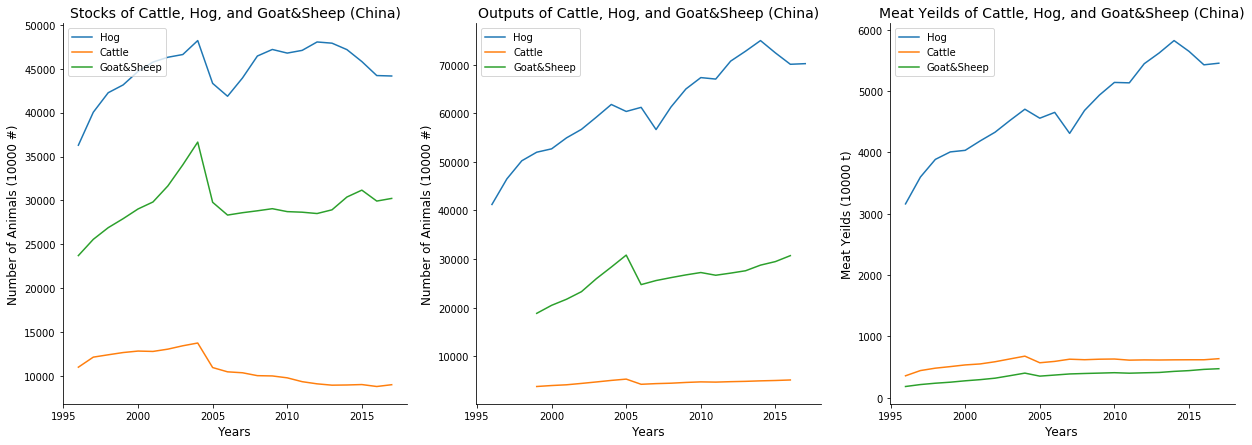

In [112]:
# create figure

fig = plt.figure()

fig_size = (21,7)
tit_size = 14
lab_size = 12
leg_size = 10
tck_size = 10

# draw subplots
ax0 = fig.add_subplot(1,3,1) # add subplot 1 (2 row, 2 columns, 1st plot)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)

# draw data
ax_CHGS_in_cn = df_data[col_AY+CHGS_in][df_data['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, ax=ax0)

ax_CHGS_out_cn = df_data[col_AY+CHGS_out][df_data['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size, ax=ax1)

ax_CHGS_yeild_cn = df_data[col_AY+CHGS_yeild][df_data['AreaName']=='China'].plot(
    kind='line', x='Year', figsize=fig_size,ax=ax2)

# set title, ylabel
ax0.set_title('Stocks of Cattle, Hog, and Goat&Sheep (China)', fontsize=tit_size)
ax0.set_ylabel('Number of Animals (10000 #)', fontsize=lab_size)

ax1.set_title('Outputs of Cattle, Hog, and Goat&Sheep (China)',fontsize=tit_size)
ax1.set_ylabel('Number of Animals (10000 #)', fontsize=lab_size)

ax2.set_title('Meat Yeilds of Cattle, Hog, and Goat&Sheep (China)',fontsize=tit_size)
ax2.set_ylabel('Meat Yeilds (10000 t)', fontsize=lab_size)

# set xlabels and legends
def setLabels(ax):
    ax.set_xlabel('Years', fontsize=lab_size)
    ax.legend(['Hog','Cattle', 'Goat&Sheep'], loc='upper left', fontsize=leg_size)
for ax in [ax0, ax1, ax2]:
    setLabels(ax)

# set visibility of spines
def setSpines(ax_data):
    ax_data.spines['top'].set_visible(False)
    ax_data.spines['right'].set_visible(False)    
for ax_data in [ax_CHGS_in_cn, ax_CHGS_out_cn, ax_CHGS_yeild_cn]:
    setSpines(ax_data)
    
plt.show()

图1：全国猪、牛、羊的年末存栏量（相当于养殖规模）

图2：全国猪、牛、羊的出栏量（相当于粗产量）

图3：全国猪肉、牛肉、羊肉的产量（屠宰去头、蹄、骨后的胴体重量）